In [159]:
import os
import speech_recognition as sr
import librosa
import librosa.display
import pandas as pd
from scipy import signal
import IPython.display as ipd
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
from sklearn.model_selection import train_test_split

In [2]:
os.listdir(path='Audio_Speech_Actors')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'Audio_Speech_Actors'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1441

In [3]:
listOfFiles

['Audio_Speech_Actors/Actor_16/03-01-05-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-02-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-05-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-01-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-02-01-16.wav',
 'Audio_Speech

In [4]:
listOfFiles.index('Audio_Speech_Actors/.DS_Store')

480

In [5]:
listOfFiles.pop(480)

'Audio_Speech_Actors/.DS_Store'

In [6]:
def read_audio(list_audio):
    data_list=[]
    sampling_rate_list=[]
    for audio in list_audio:
        data, sampling_rate = librosa.load(audio)
        data_list.append(data)
        sampling_rate_list.append(sampling_rate)
    return data_list, sampling_rate_list
data_list, sampling_rate_list=read_audio(listOfFiles)

In [7]:
listOfFiles

['Audio_Speech_Actors/Actor_16/03-01-05-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-06-02-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-05-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-04-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-07-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-02-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-08-01-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-01-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-01-01-02-02-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-02-01-02-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-02-01-01-16.wav',
 'Audio_Speech_Actors/Actor_16/03-01-03-01-02-01-16.wav',
 'Audio_Speech

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [8]:
data = pd.DataFrame(columns=['Path', 'Emotion', 'Emotion_intensity','Statement','Gender']) 

In [9]:
speech_dir = 'Audio_Speech_Actors/'
actors = [dir for dir in os.listdir(speech_dir) if dir.startswith('Actor_')]
print(actors)

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [10]:
# Iterated through every data folders and the data 
for dir in actors:
    act_dir = os.path.join(speech_dir,dir)
    for wav in os.listdir(act_dir):
        # get file name with labels
        identifiers = wav.split('.')[0].split('-')
        # Extracted file name and stored it in list after spliting
        emotion = (int(identifiers[2]))
        # lable corrsponding to emotion is stored in variable emotion
        emotion_intensity = (int(identifiers[3]))
        if int(identifiers[6])%2 == 0:
            gender = 'female'
        else:
            gender = 'male'
        # extracted gender lable based on label value (even for female and odd for male)
        statement = (int(identifiers[4]))
        # extract statement 
        file_path = os.path.join(act_dir, wav).replace("\\","/")
        # chage the path representation in windows
        data = data.append({"Path": file_path,
                            "Emotion": emotion,
                            "Emotion_intensity": emotion_intensity,
                            "Statement": statement,
                            "Gender": gender,
                             },
                             ignore_index = True
                          )
        # Append the extrated labels to data frame.

In [11]:
data.Emotion.unique()

array([5, 6, 7, 4, 8, 3, 2, 1], dtype=object)

In [12]:
def label_emotion(emotion):
    """
    This method is called to label the emotion into one of 8 categories.
    """
    if emotion == 1 :
        return 'neutral'
    elif emotion == 2:
        return 'calm'
    elif emotion == 3:
        return 'happy'
    elif emotion == 4:
        return 'sad'
    elif emotion == 5:
        return 'angry'
    elif emotion == 6:
        return 'fearful'
    elif emotion == 7:
        return 'disgust'
    else: 
        return 'surprised'

In [13]:
data['Emotion']= data.Emotion.apply(label_emotion)

In [14]:
def label_statement(statement):
    """
    This method is called to label the statement into one of 2 categories.
    """
    if statement == 1 :
        return 'kids'
    else: 
        return 'dogs'

In [15]:
data['Statement']= data.Statement.apply(label_statement)

In [16]:
def label_intensity(intensity):
    """
    This method is called to label the intensity into one of 2 categories.
    """
    if intensity == 1 :
        return 'normal'
    else: 
        return 'strong'

In [17]:
data['Emotion_intensity']= data.Emotion_intensity.apply(label_intensity)

In [18]:
data

,Path,Emotion,Emotion_intensity,Statement,Gender
0,Audio_Speech_Actors/Actor_16/03-01-05-01-02-01...,angry,normal,dogs,female
1,Audio_Speech_Actors/Actor_16/03-01-06-01-02-02...,fearful,normal,dogs,female
2,Audio_Speech_Actors/Actor_16/03-01-06-02-01-02...,fearful,strong,kids,female
3,Audio_Speech_Actors/Actor_16/03-01-05-02-01-01...,angry,strong,kids,female
4,Audio_Speech_Actors/Actor_16/03-01-07-01-01-01...,disgust,normal,kids,female
...,...,...,...,...,...
1435,Audio_Speech_Actors/Actor_08/03-01-03-02-02-02...,happy,strong,dogs,female
1436,Audio_Speech_Actors/Actor_08/03-01-03-01-01-02...,happy,normal,kids,female
1437,Audio_Speech_Actors/Actor_08/03-01-02-02-01-01...,calm,strong,kids,female
1438,Audio_Speech_Actors/Actor_08/03-01-02-01-02-01...,calm,normal,dogs,female


In [134]:
def target(gender, emotion):
    """
    This method is called to label the statement into one of 2 categories.
    """
    return gender+'_'+emotion 

In [135]:
data['Target']= data.apply(lambda x: target(x.Gender, x.Emotion), axis=1)

In [19]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [20]:
filename = data.Path[0]

Text(0.5, 0, 'Seconds')

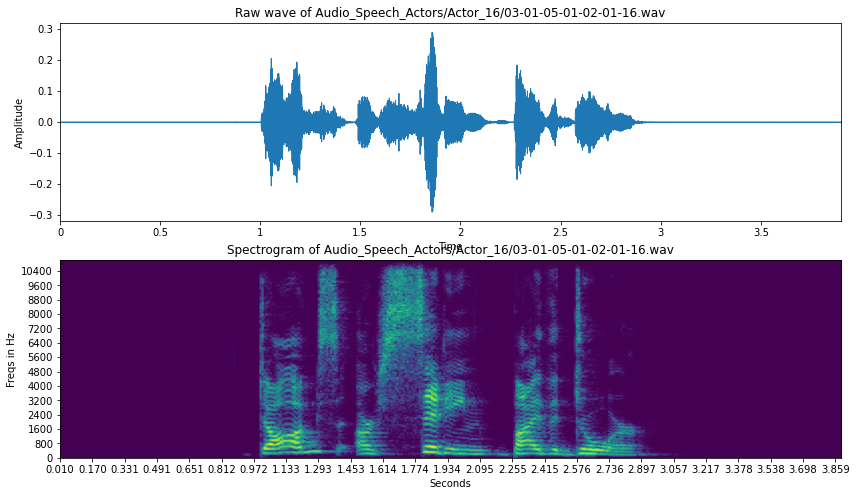

In [92]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(data_list[0], sampling_rate_list[0])

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(data_list[0], sr=sampling_rate_list[0])

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [94]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [27]:
# Trim the silence voice
aa , bb = librosa.effects.trim(data_list[0], top_db=30)
aa, bb

(array([-1.8758229e-04, -1.1675138e-04, -1.1105111e-04, ...,
        -5.7289176e-06,  1.3341569e-05, -1.0213388e-04], dtype=float32),
 array([21504, 64000]))

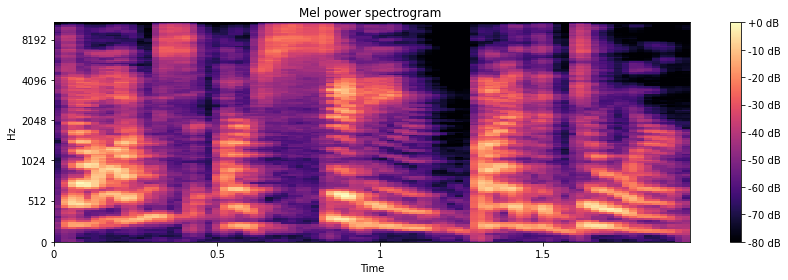

In [31]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sampling_rate_list[0], n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sampling_rate_list[0], x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

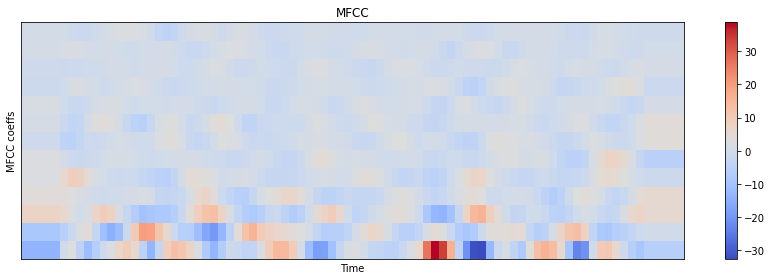

In [32]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [33]:
S.shape

(128, 84)

In [34]:
mfcc.shape

(13, 84)

In [83]:
from tqdm import tqdm
input_duration=3

audio = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data))):
    X, sample_rate = librosa.load(data.Path[i],
                                  res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    audio.loc[i] = [feature]

100%|██████████| 1440/1440 [02:09<00:00, 11.14it/s]


In [36]:
audio

,feature
0,"[-55.07453, -55.07453, -55.07453, -55.07453, -..."
1,"[-54.388466, -54.388466, -54.388466, -54.38846..."
2,"[-42.791096, -42.925762, -42.899185, -42.68892..."
3,"[-45.452774, -45.452774, -45.452774, -45.45277..."
4,"[-62.8723, -62.8723, -62.8723, -62.8723, -62.8..."
...,...
1435,"[-52.7948, -53.763607, -55.00385, -54.96499, -..."
1436,"[-53.335293, -54.241184, -52.663242, -53.00668..."
1437,"[-55.19314, -55.72388, -56.97952, -60.7733, -5..."
1438,"[-62.298923, -58.117092, -52.51449, -49.66577,..."


In [144]:
featurs_data = pd.DataFrame(audio['feature'].values.tolist())
Target = data.Target

In [145]:
featurs_data = pd.concat([featurs_data,Target], axis=1)

In [146]:
featurs_data

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,Target
0,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,...,-55.074532,-54.697842,-53.741127,-54.621086,-54.546001,-54.562290,-55.074532,-54.986717,-55.074532,female_angry
1,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,...,-53.333660,-54.219997,-54.251675,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,female_fearful
2,-42.791096,-42.925762,-42.899185,-42.688927,-42.425762,-42.087055,-41.129875,-40.550945,-39.232639,-39.827827,...,-42.256557,-42.267982,-42.284805,-42.284805,-42.284805,-42.284805,-42.284805,-42.080303,-42.278969,female_fearful
3,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,...,-45.452774,-45.452774,-44.339504,-45.410488,-45.452774,-45.443420,-44.609249,-44.860779,-45.452774,female_angry
4,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,...,-60.132027,-59.421566,-56.944618,-55.152115,-56.732174,-62.172836,-61.767502,-58.865089,-56.552303,female_disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-52.794800,-53.763607,-55.003849,-54.964989,-54.323025,-55.138943,-51.768867,-51.738060,-51.537483,-50.650475,...,-48.470703,-47.581318,-45.567196,-45.458992,-42.654377,-41.474724,-40.475830,-38.452927,-36.337105,female_happy
1436,-53.335293,-54.241184,-52.663242,-53.006680,-52.754692,-52.673523,-51.280819,-52.471199,-52.866074,-51.250862,...,-54.236790,-55.375771,-52.620754,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
1437,-55.193138,-55.723881,-56.979519,-60.773300,-55.671585,-53.729599,-53.668484,-53.156345,-54.001930,-55.969090,...,-62.107414,-59.763035,-57.989464,-56.036190,-56.420681,-59.163715,-57.135174,-59.056145,-58.450710,female_calm
1438,-62.298923,-58.117092,-52.514488,-49.665771,-50.454319,-52.708809,-52.650169,-51.722149,-51.405098,-55.263344,...,-53.134724,-51.981689,-52.611149,-54.987103,-55.162971,-54.362507,NaN,NaN,NaN,female_calm


In [147]:
featurs_data.isna().sum()

0           0
1           0
2           0
3           0
4           0
         ... 
255       316
256       377
257       377
258       377
Target      0
Length: 260, dtype: int64

In [148]:
featurs_data.fillna(0, inplace=True)

In [149]:
featurs_data.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
255       0
256       0
257       0
258       0
Target    0
Length: 260, dtype: int64

## Augmentation on raw data

In [43]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

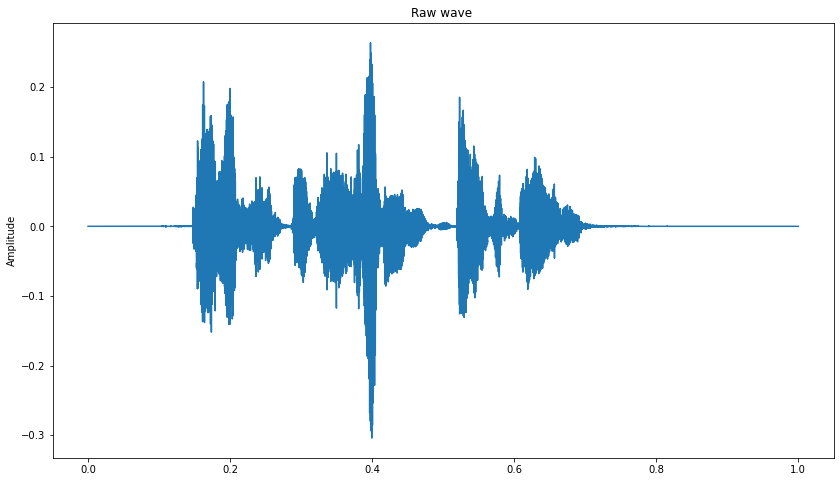

In [44]:
X, sample_rate = librosa.load(data.Path[0], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

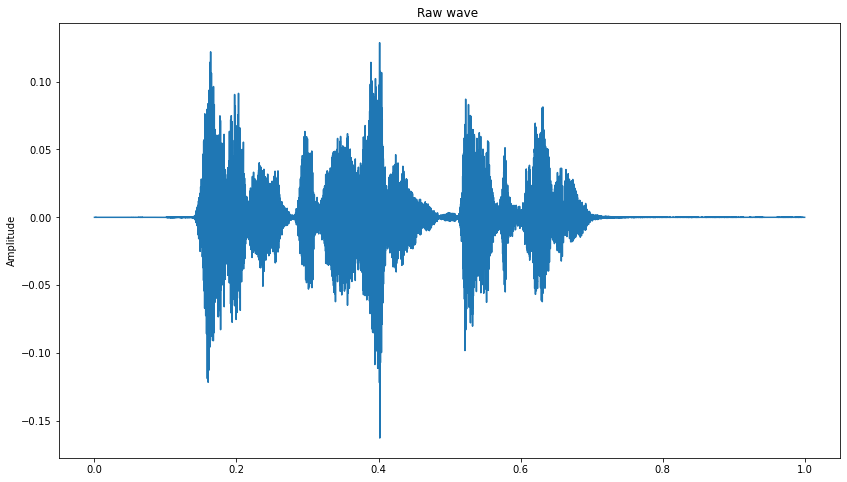

In [45]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

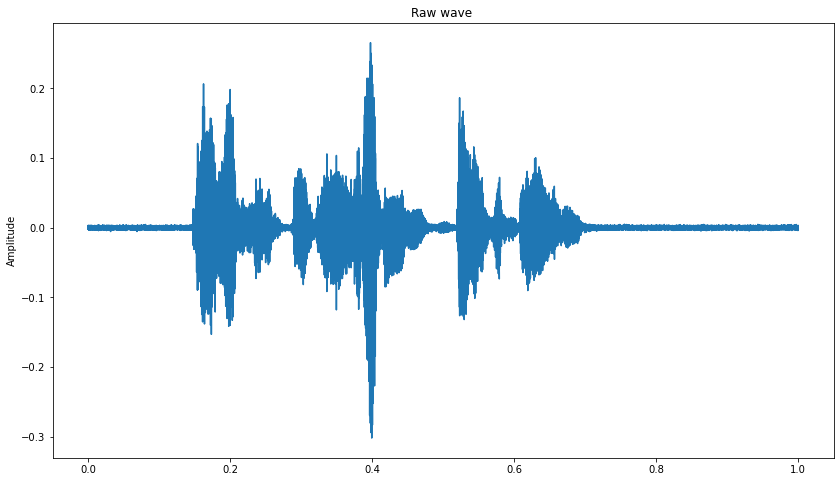

In [46]:
x = noise(X)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

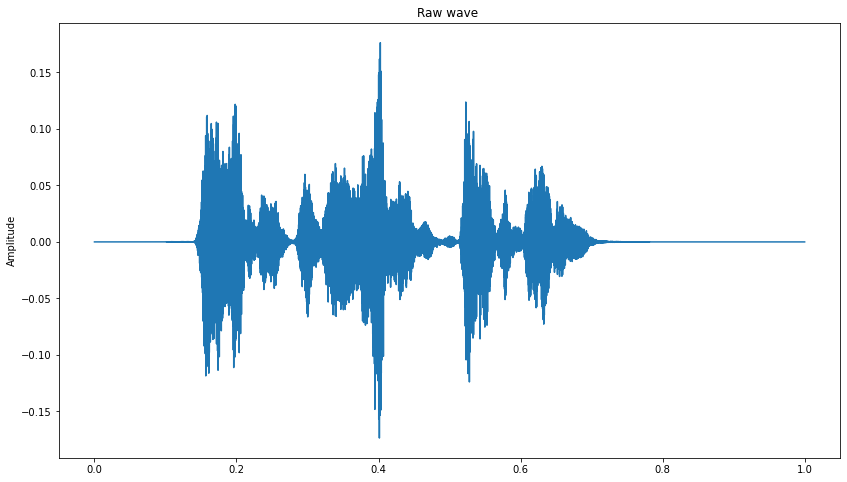

In [47]:
x = stretch(X,rate=0.6)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [151]:
# Augmentation Method 1

syn_data1 = pd.DataFrame(columns=['Feature', 'Target'])
for i in tqdm(range(len(data))):
    X, sample_rate = librosa.load(data.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data.target[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data.target[i]]

100%|██████████| 1440/1440 [02:55<00:00,  8.21it/s]


In [152]:
# Augmentation Method 2

syn_data2 = pd.DataFrame(columns=['Feature', 'Target'])
for i in tqdm(range(len(data))):
    X, sample_rate = librosa.load(data.Path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data.target[i]:
        X = stretch(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data.target[i]]

100%|██████████| 1440/1440 [04:31<00:00,  5.30it/s]


In [153]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [154]:
df4 = pd.DataFrame(syn_data1['Feature'].values.tolist())
labels4 = syn_data1.Target
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "Target"})
syndf1 = syndf1.fillna(0)

In [155]:
df5 = pd.DataFrame(syn_data2['Feature'].values.tolist())
labels5 = syn_data2.Target
syndf2 = pd.concat([df5,labels5], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "Target"})
syndf2 = syndf2.fillna(0)

In [156]:
len(syn_data2)

1440

In [157]:
# Combining the Augmented data with original
combined_df = pd.concat([featurs_data, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,-55.074532,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,-54.388466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-42.791096,-42.925762,-42.899185,-42.688927,-42.425762,-42.087055,-41.129875,-40.550945,-39.232639,-39.827827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,-45.452774,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,-62.872299,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,-54.228569,-55.209988,-57.006229,-57.516212,-56.979614,-57.135418,-56.813946,-57.595314,-56.697197,-55.108322,...,-52.090244,-49.241489,-48.862358,-48.153713,-47.725410,-45.606567,-43.591228,-43.015465,-42.781902,-43.626396
4316,-53.673393,-55.565529,-56.133766,-54.481808,-54.689152,-54.687336,-54.231499,-53.881004,-54.518085,-55.776646,...,-58.085037,-58.283699,-58.153038,-60.296806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4317,-55.199184,-56.364605,-57.780319,-58.562607,-61.047947,-59.350754,-55.148006,-55.180195,-55.794003,-55.319160,...,-62.034058,-62.736286,-60.477234,-59.156269,-58.868103,-58.594482,-58.787205,-59.341988,-61.007915,-61.117569
4318,-61.585678,-59.360615,-57.027908,-54.754948,-51.723282,-51.954834,-54.422421,-56.907856,-56.377335,-55.454609,...,-57.948242,-56.319656,-57.236759,-57.544758,-55.760803,-56.794819,-59.717728,0.000000,0.000000,0.000000


In [158]:
combined_df.Target

0         female_angry
1       female_fearful
2       female_fearful
3         female_angry
4       female_disgust
             ...      
4315      female_happy
4316      female_happy
4317       female_calm
4318       female_calm
4319    female_neutral
Name: Target, Length: 4320, dtype: object

## Split Data

In [310]:
X= combined_df.drop('Target', axis=1)
y= combined_df.Target

In [311]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X_train , X_test, y_train,y_test = train_test_split(X,y, test_size=.2, random_state= 42)
X_train , X_val, y_train,y_val = train_test_split(X_train,y_train, test_size=.25, random_state= 42)

In [312]:
y_train.shape

(2592,)

In [313]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [314]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [316]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [317]:
print(lb.classes_)

['female_angry' 'female_calm' 'female_disgust' 'female_fearful'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprised'
 'male_angry' 'male_calm' 'male_disgust' 'male_fearful' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprised']


In [318]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [319]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.019675925925925927

In [320]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [336]:
y_train_hot = tf.one_hot(y_train, 16)

## Model 

In [342]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

# #BUILD 1D CNN LAYERS
# model = tf.keras.Sequential()
# model.add(Dense(2, input_dim = X_train.shape[1], name = '2D_layer'))
# # model.add(layers.Conv2D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
# model.add(layers.Conv2D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# model.add(layers.MaxPooling1D(pool_size=(8)))
# model.add(layers.Dropout(0.4))
# model.add(layers.Conv2D(128, kernel_size=(10),activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=(8)))
# model.add(layers.Dropout(0.4))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(8, activation='softmax'))
# opt = keras.optimizers.Adam(lr=0.001)
# model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
# model.summary()

In [348]:
NN = Sequential()

# NN.add(Dense(2, input_dim = X_train.shape[1], name = '2D_layer'))
# model.add(Flatten())
# NN.add(Activation('relu'))

# NN.add(Dense(1))
# model.add(Flatten())
# NN.add(Activation('softmax'))

# NN.compile(loss='binary_crossentropy', optimizer='adam')
# NN.fit(X_train, y_train, epochs=65, batch_size=32, verbose=1)


model = tf.keras.Sequential()
tf.keras.layers.Dense(3, activation = 'softmax')


In [355]:
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [363]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [357]:
model_history=model.fit(X_train, y_train,batch_size=32, epochs=10, verbose=1)

Epoch 1/10
81/81 [==============================] - 62s 766ms/step - loss: 2.6743 - accuracy: 0.1262
Epoch 2/10
81/81 [==============================] - 57s 703ms/step - loss: 2.6091 - accuracy: 0.1435
Epoch 3/10
81/81 [==============================] - 61s 757ms/step - loss: 2.5647 - accuracy: 0.1613
Epoch 4/10
81/81 [==============================] - 57s 702ms/step - loss: 2.5269 - accuracy: 0.1755
Epoch 5/10
81/81 [==============================] - 58s 720ms/step - loss: 2.4995 - accuracy: 0.1821
Epoch 6/10
81/81 [==============================] - 57s 709ms/step - loss: 2.4759 - accuracy: 0.1890
Epoch 7/10
81/81 [==============================] - 59s 730ms/step - loss: 2.4434 - accuracy: 0.1956
Epoch 8/10
81/81 [==============================] - 58s 719ms/step - loss: 2.4220 - accuracy: 0.2110
Epoch 9/10
81/81 [==============================] - 60s 741ms/step - loss: 2.4109 - accuracy: 0.2076
Epoch 10/10
81/81 [==============================] - 57s 701ms/step - loss: 2.3923 - accura

In [360]:
predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)

accuracy_score(y_test, classes_x)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [219]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Input, Flatten, Dropout, Activation, Dense
import keras
from keras import regularizers

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix,accuracy_score
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2


In [377]:
model1 = Sequential()

model1.add(Conv1D(256, 5,padding='same',
                 input_shape=(X_train.shape[1],1)))
model1.add(Activation('relu'))
model1.add(Conv1D(128, 5,padding='same'))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))
model1.add(MaxPooling1D(pool_size=(8)))
model1.add(Conv1D(128, 5,padding='same',))
model1.add(Activation('relu'))
model1.add(Conv1D(128, 5,padding='same',))
model1.add(Activation('relu'))
model1.add(Flatten())
model1.add(Dense(16))
model1.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [378]:
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model1.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_102 (Conv1D)         (None, 323, 256)          1536      
                                                                 
 activation_113 (Activation)  (None, 323, 256)         0         
                                                                 
 conv1d_103 (Conv1D)         (None, 323, 128)          163968    
                                                                 
 activation_114 (Activation)  (None, 323, 128)         0         
                                                                 
 dropout_49 (Dropout)        (None, 323, 128)          0         
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 40, 128)          0         
 g1D)                                                            
                                                     

In [373]:
model_history=model1.fit(X_train, y_train,batch_size=32, epochs=10, verbose=1)

Epoch 1/10
81/81 [==============================] - 19s 211ms/step - loss: 2.7580 - accuracy: 0.1088
Epoch 2/10
81/81 [==============================] - 27s 329ms/step - loss: 2.7180 - accuracy: 0.1331
Epoch 3/10
81/81 [==============================] - 23s 278ms/step - loss: 2.6551 - accuracy: 0.1427
Epoch 4/10
81/81 [==============================] - 24s 295ms/step - loss: 2.5683 - accuracy: 0.1601
Epoch 5/10
81/81 [==============================] - 23s 288ms/step - loss: 2.4702 - accuracy: 0.1802
Epoch 6/10
81/81 [==============================] - 21s 254ms/step - loss: 2.3757 - accuracy: 0.2099
Epoch 7/10
81/81 [==============================] - 21s 254ms/step - loss: 2.2938 - accuracy: 0.2326
Epoch 8/10
81/81 [==============================] - 21s 257ms/step - loss: 2.2279 - accuracy: 0.2496
Epoch 9/10
81/81 [==============================] - 22s 264ms/step - loss: 2.1755 - accuracy: 0.2620
Epoch 10/10
81/81 [==============================] - 21s 261ms/step - loss: 2.1348 - accura

In [375]:
model2 = tf.keras.Sequential()
model2.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model2.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(layers.MaxPooling1D(pool_size=(8)))
model2.add(layers.Dropout(0.4))
model2.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(8)))
model2.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(16, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.001)

In [376]:
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_99 (Conv1D)          (None, 314, 64)           704       
                                                                 
 conv1d_100 (Conv1D)         (None, 305, 128)          82048     
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 38, 128)          0         
 g1D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 38, 128)           0         
                                                                 
 conv1d_101 (Conv1D)         (None, 29, 128)           163968    
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 3, 128)           0         
 g1D)                                                

In [379]:
model_history=model2.fit(X_train, y_train,batch_size=32, epochs=10, verbose=1)

Epoch 1/10
81/81 [==============================] - 13s 150ms/step - loss: 2.9165 - accuracy: 0.1393
Epoch 2/10
81/81 [==============================] - 12s 143ms/step - loss: 2.4429 - accuracy: 0.1867
Epoch 3/10
81/81 [==============================] - 11s 137ms/step - loss: 2.2662 - accuracy: 0.2072
Epoch 4/10
81/81 [==============================] - 11s 141ms/step - loss: 2.1895 - accuracy: 0.2353
Epoch 5/10
81/81 [==============================] - 12s 144ms/step - loss: 2.1209 - accuracy: 0.2589
Epoch 6/10
81/81 [==============================] - 11s 139ms/step - loss: 2.0473 - accuracy: 0.2782
Epoch 7/10
81/81 [==============================] - 13s 166ms/step - loss: 1.9805 - accuracy: 0.2986
Epoch 8/10
81/81 [==============================] - 18s 224ms/step - loss: 1.9427 - accuracy: 0.3202
Epoch 9/10
81/81 [==============================] - 18s 217ms/step - loss: 1.9128 - accuracy: 0.3299
Epoch 10/10
81/81 [==============================] - 19s 237ms/step - loss: 1.8876 - accura

In [243]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40)

Epoch 1/40


ValueError: in user code:

    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/amjad/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 16) and (32, 8) are incompatible


In [248]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [187]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [202]:
X_traincnn.shape

(2592, 323, 1)

In [102]:
# import matplotlib.pyplot as plt
# import scipy.io.wavfile
# import numpy as np
# import sys


# sr,x = scipy.io.wavfile.read(listOfFiles[0])

# ## Parameters: 10ms step, 30ms window
# nstep = int(sr * 0.01)
# nwin  = int(sr * 0.03)
# nfft = nwin

# window = np.hamming(nwin)

# ## will take windows x[n1:n2].  generate
# ## and loop over n2 such that all frames
# ## fit within the waveform
# nn = range(nwin, len(x), nstep)

# X = np.zeros( (len(nn), nfft//2) )

# for i,n in enumerate(nn):
#     xseg = x[n-nwin:n]
#     z = np.fft.fft(window * xseg, nfft)
#     X[i,:] = np.log(np.abs(z[:nfft//2]))

# plt.imshow(X.T, interpolation='nearest',
#     origin='lower',
#     aspect='auto')

# plt.show()

In [103]:
# # Convert to mel-spectrogram
# mel_spectrogram = tfio.audio.melscale(
#     spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)


# plt.figure()
# plt.imshow(tf.math.log(mel_spectrogram).numpy())

# # Convert to db scale mel-spectrogram
# dbscale_mel_spectrogram = tfio.audio.dbscale(
#     mel_spectrogram, top_db=80)

# plt.figure()
# plt.imshow(dbscale_mel_spectrogram.numpy())

In [104]:
# # Freq masking
# freq_mask = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)
# plt.figure()
# plt.imshow(freq_mask.numpy());

In [105]:
# # Time masking
# time_mask = tfio.audio.time_mask(dbscale_mel_spectrogram, param=10)

# plt.figure()
# plt.imshow(time_mask.numpy());